In [293]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

# Challenge Overview:

Blue Nova Telecoms was born out of a need for reliable and affordable PREMIUM internet connectivity.

Below is a challenge which needs to be completed within 72 hours of receipt of this assessment. Task Detail:
Predicting churn for telco customers.

## Introduction

In this challenge we aim to determine whether or not a person will Churn using Customers who left within the last month data , Customer Demographics , Services that each customer has signed up for and Customer account information. As such this is a classification problem and we will be using classification techniques to gain useful insights and make predictions on our dataset.

Our dataset contains structure and label data which contains both numerical and categorical data. Also because our data is labeled we will use Supervised Machine Learning Algorithms for our preditions.

### Aim
* To make recommendations based on analysis
* Create interesting data visualisations to demonstrate useful insights.
* Make predictions on data to determine whether or not a customer will Churn 

### Importing Datasets¶

The train perfromance dataset



In [294]:
dataset = pd.read_csv("Downloads\data.csv")

In [295]:
dataset.head()

,Row,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,5678-VFNEQ,Female,0,Yes,No,71,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),104.10,7412.25,No
1,2,5977-CKHON,Female,0,Yes,Yes,43,Yes,Yes,Fiber optic,...,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),92.55,4039,No
2,3,2692-BUCFV,Male,1,No,No,29,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.45,2948.6,No
3,4,7861-UVUFT,Female,0,Yes,No,15,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,84.30,1308.4,Yes
4,5,1830-GGFNM,Male,0,Yes,Yes,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,No,Two year,No,Credit card (automatic),94.55,6078.75,No


### Summary Statistics
In this section we will explore the data types and the summary statistics of our variables.

Let's start by looking at the data types and number of entries of each column.

In [296]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Row               5634 non-null   int64  
 1   customerID        5634 non-null   object 
 2   gender            5634 non-null   object 
 3   SeniorCitizen     5634 non-null   int64  
 4   Partner           5634 non-null   object 
 5   Dependents        5634 non-null   object 
 6   tenure            5634 non-null   int64  
 7   PhoneService      5634 non-null   object 
 8   MultipleLines     5634 non-null   object 
 9   InternetService   5634 non-null   object 
 10  OnlineSecurity    5634 non-null   object 
 11  OnlineBackup      5634 non-null   object 
 12  DeviceProtection  5634 non-null   object 
 13  TechSupport       5634 non-null   object 
 14  StreamingTV       5634 non-null   object 
 15  StreamingMovies   5634 non-null   object 
 16  Contract          5634 non-null   object 


In [297]:
dataset.describe()

,Row,SeniorCitizen,tenure,MonthlyCharges
count,5634.000000,5634.000000,5634.000000,5634.000000
mean,2817.500000,0.163117,32.469826,64.451739
std,1626.540039,0.369505,24.547311,30.178672
min,1.000000,0.000000,0.000000,18.250000
25%,1409.250000,0.000000,9.000000,35.100000
50%,2817.500000,0.000000,29.000000,70.150000
75%,4225.750000,0.000000,55.000000,89.887500
max,5634.000000,1.000000,72.000000,118.750000


Due to the nature of some of the features we will need to standardise the values for better predictions

# Exploratory Data Analysis¶

## Data Visualisations of Customer account information

<AxesSubplot:>

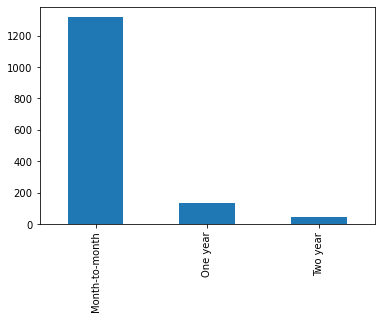

In [298]:
dataset[dataset.Churn == 'Yes'].Contract.value_counts().plot(kind = 'bar')

## The plot shows the Customer Contract 

* We have a large number of customer on a month-to-month who will Churn 
* We have less than 200 customers on a one year contract who has a chace of churning 
* Very little number of customers on a two years contract that has a possibility of churning 

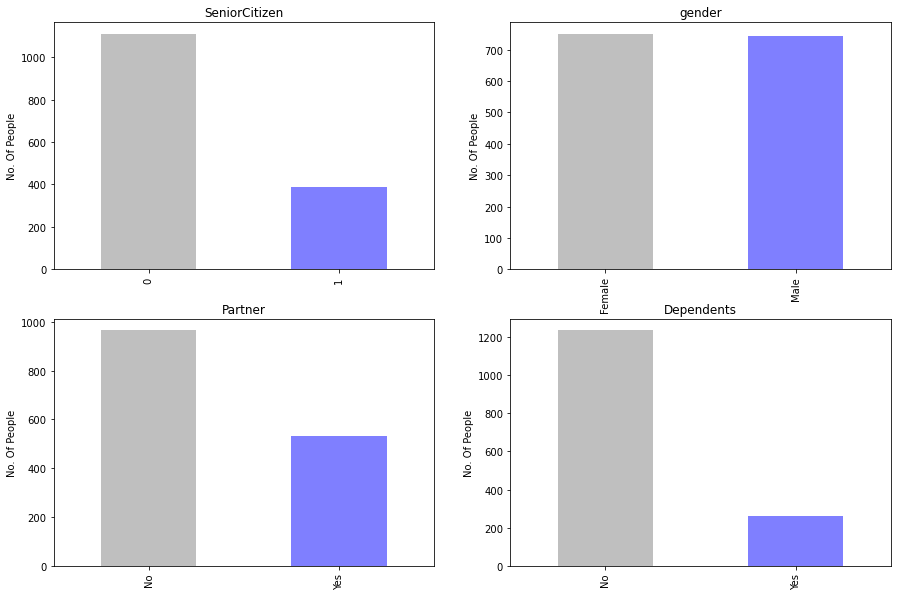

In [299]:
df1 = dataset[dataset.Churn == 'Yes'].SeniorCitizen.value_counts()
df2 = dataset[dataset.Churn == 'Yes'].gender.value_counts()
df3 = dataset[dataset.Churn == 'Yes'].Partner.value_counts()
df4 = dataset[dataset.Churn == 'Yes'].Dependents.value_counts()
#define number of rows and columns for subplots
nrow=2
ncol=2

# make a list of all dataframes 
df_list = [df1 ,df2, df3, df4]

df_titles = ['SeniorCitizen', 'gender', 'Partner', 'Dependents']

fig, axes = plt.subplots(2,2,figsize=(15,10))

# plot counter
count=0
for r in range(nrow):
    for c in range(ncol):
        df_list[count].plot(kind='bar', ax=axes[r,c] ,color = ['grey', 'blue'], alpha=0.5, title = df_titles[count], ylabel ='No. Of People')
        count+=1

### Data Visualisations of Customer Demographics

* On the first graph on the qualtrics We have a large number of none-Senior Citizen that who has a high possibility to Churn 
* Second graph shows that gender has no effect on a person churning or not 
* Third graph show that number of people who does not have partners has greater risk of churning 
* Last graph tell us that people with no dependents have a high possibilty of of churning than those you have dependents 




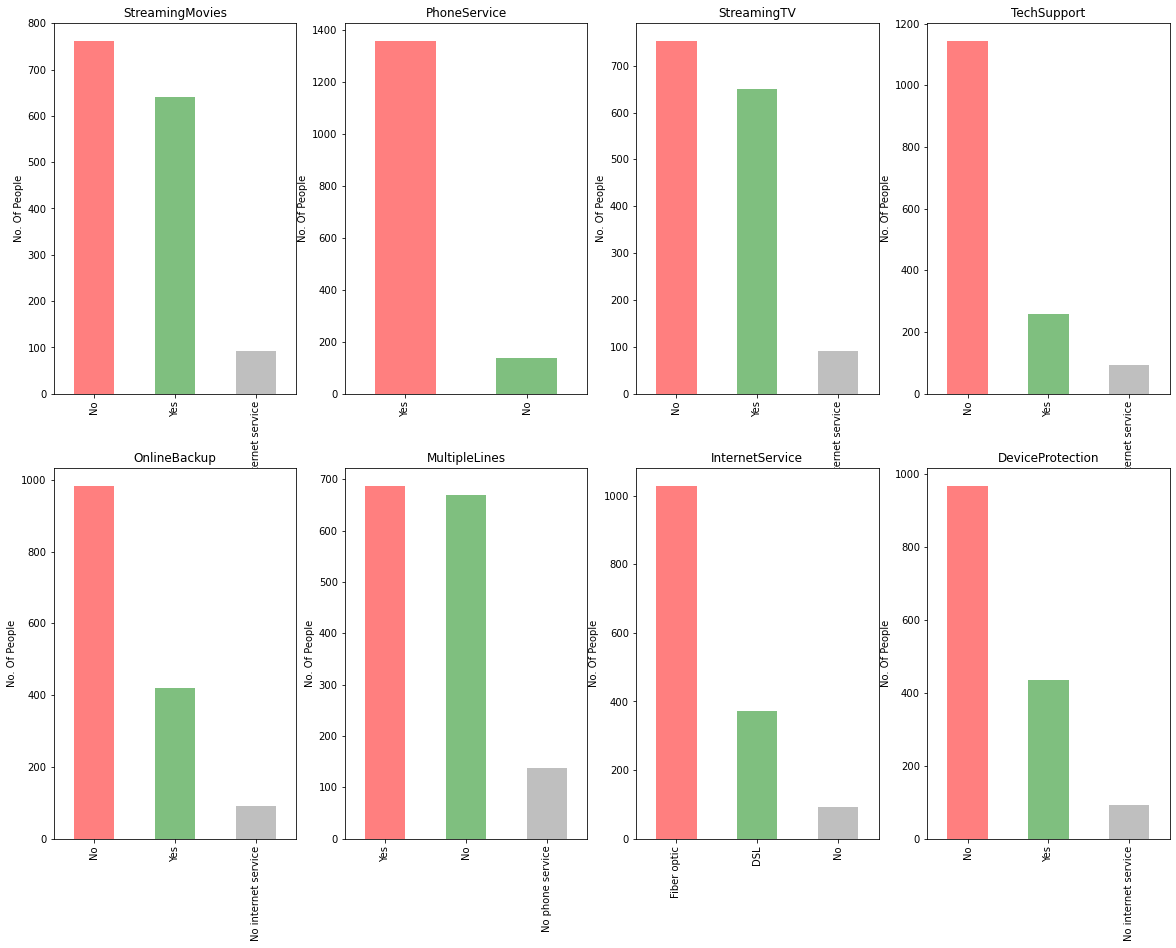

In [300]:
df1 = dataset[dataset.Churn == 'Yes'].StreamingMovies.value_counts()
df2 = dataset[dataset.Churn == 'Yes'].PhoneService.value_counts()
df3 = dataset[dataset.Churn == 'Yes'].StreamingTV.value_counts()
df4 = dataset[dataset.Churn == 'Yes'].TechSupport.value_counts()
df5 = dataset[dataset.Churn == 'Yes'].OnlineBackup.value_counts()
df6 = dataset[dataset.Churn == 'Yes'].MultipleLines.value_counts()
df7 = dataset[dataset.Churn == 'Yes'].InternetService.value_counts()
df8 = dataset[dataset.Churn == 'Yes'].DeviceProtection.value_counts()
#define number of rows and columns for subplots
nrow=2
ncol=4

# make a list of all dataframes 
df_list = [df1 ,df2, df3, df4, df5, df6, df7, df8]

df_titles = ['StreamingMovies', 'PhoneService', 'StreamingTV', 'TechSupport', 'OnlineBackup', 'MultipleLines', 'InternetService', 'DeviceProtection']

fig, axes = plt.subplots(2,4,figsize=(20,15))

# plot counter
count=0
for r in range(nrow):
    for c in range(ncol):
        df_list[count].plot(kind='bar', ax=axes[r,c] ,color = ['red', 'green','grey'], alpha=0.5, title = df_titles[count], ylabel ='No. Of People')
        count+=1

### Data Visualisations of Services that each customer has signed up for
* A large number of customers who do not stream movies have a high chance of churning followed by those who do stream movies and a small number of those who do not have internet service
* We at a risk of customers who dont have phone services churning than those who have 
* A large number of customers that does not stream TV have a high chance of churning followed by those who have it and a very small number of those who does not have internet service 
* We have a large number of people who does not have tech supoort and have a high risk of churning followed by those who have tech support and a small number of those have dont have internet service 
* We have more than 90% of customers who dont have online backup and at risk of churning and less than 50% of those who do have online backup
* There is a very small effect on a customer having mulyiplelines churning
* A large number of customers on the fibre optic have a great chance to churn followed by DSL
* Large number of people who does not have device protection has a large number of churning 

<AxesSubplot:title={'center':'PaymentMethod'}>

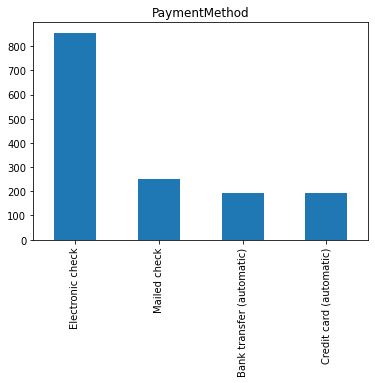

In [301]:
dataset[dataset.Churn == 'Yes'].PaymentMethod.value_counts().plot(kind = 'bar', title ='PaymentMethod')

### Data Visualisations of Customer payment Method

* A large number of customers on electronic check has a high chance of churning followed by mailed check 
* Bank transfer and Credit card payment has no effect on customer churning 


<AxesSubplot:title={'center':'PaperlessBilling'}>

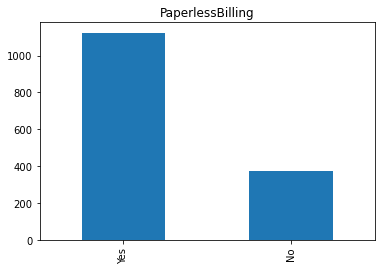

In [302]:
dataset[dataset.Churn == 'Yes'].PaperlessBilling.value_counts().plot(kind = 'bar', title = 'PaperlessBilling')

### Data Visualisations of Customer Paperless Billing

* The graph shows that a large number of customers on a paperless billing have churned


## Data Cleaning

### Categorical Variable Encoding
We will encode categorical values with numberical ones on the some columns with catagorical values 

In [303]:
# Function that takes and dataframe and categorical feature name to be encoded and returns encoded dataframe
def feat_encode(df, col_name):
    # Get unique categories from column
    keys = list(df[col_name].unique())
    # Get index for each unique category to be encoded value
    values = [val for val in range(len(keys))]
    # Create dictionary of the above keys and values
    encode_dict = dict(zip(keys,values))
    # Alter dataframe entries by swapping each category name with values
    df[col_name] = df[col_name].apply(lambda x: encode_dict[x])
    # Return altered dataframe
    return df

In [304]:
def data_en(df):
    le = LabelEncoder()
    for col in df:
        if df[col].dtypes== 'object':
            df[col]=le.fit_transform(df[col])
    return df

In [305]:
#cols = ['gender','Partner','Dependents','PhoneService','TotalCharges','PaymentMethod','PaperlessBilling','Contract','StreamingMovies','StreamingTV','TechSupport','OnlineBackup','OnlineSecurity','MultipleLines','InternetService','DeviceProtection','Churn']
#for name in cols:
dataset = data_en(dataset)

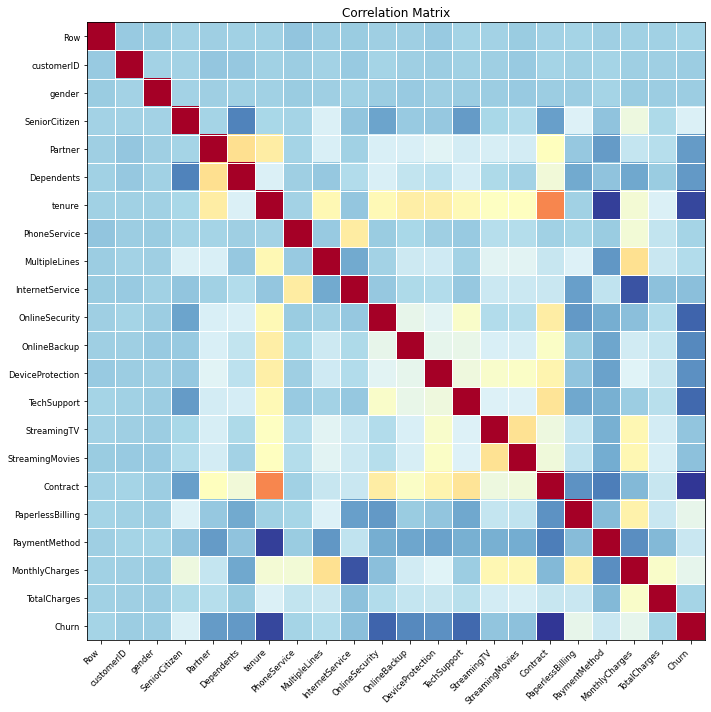

In [306]:
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(10,10));
ax = fig.add_subplot(111);
plot_corr(dataset.corr(), xnames = dataset.corr().columns, ax=ax);

* From the above correlation matrix we see that there is a perfect correlation between SiniorCitizen and PaymentMethod, which makes sense since we only have few SeniorCitizen using bank transfer payment method.
* There is also a high correlation between the PaperlessBilling and the monthlyCharges. Since is an easy way to receive your monthly statement and it clears the clutter of paper bills.
* Finally, the SeniorCitizen and PaymentMethod would make a fairly good predictor for whether or not a person will Churn.

In [307]:
dataset.head()

,Row,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,3216,0,0,1,0,71,1,2,1,...,2,0,2,2,1,1,1,104.10,4627,0
1,2,3379,0,0,1,1,43,1,2,1,...,2,0,0,2,0,1,0,92.55,2785,0
2,3,1490,1,1,0,0,29,1,0,1,...,2,0,2,2,0,1,0,101.45,2050,0
3,4,4450,0,0,1,0,15,1,0,1,...,2,0,2,0,0,1,2,84.30,450,1
4,5,978,1,0,1,1,65,1,2,1,...,2,2,0,0,2,0,1,94.55,3992,0


### Variable Selection and Preprocessing

In [308]:
def data_preprocess(df):
    le = LabelEncoder()
    for col in df:
        if df[col].dtypes== 'object':
            df[col]=le.fit_transform(df[col])
    X = df[['tenure','Contract', 'PaperlessBilling', 'MonthlyCharges', 'TechSupport']]
    y = df.Churn
    scaler = MinMaxScaler(feature_range=(0, 1))
    rescaledX = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(rescaledX,
                                y,
                                test_size=0.2,
                                random_state=42)
    return (X_train, y_train), (X_test, y_test)

In [309]:
(X_train, y_train), (X_test, y_test) = data_preprocess(dataset)
print(X_train[:1])
print(y_train[:1])
print(X_test[:1])
print(y_test[:1])

[[0.29166667 0.         0.         0.46865672 0.        ]]
4082    0
Name: Churn, dtype: int32
[[0.23611111 0.         1.         0.50497512 1.        ]]
2121    0
Name: Churn, dtype: int32


In [310]:
def train_model(X_train, y_train):
    lm = LogisticRegression()
    lm.fit(X_train,y_train)
    return lm

## Testing Our Models
Models to Evaluate
We will use logistic regression validate scores 

In [311]:
# Function to calculate mean absolute error
def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
    return accuracies.mean()

In [312]:
# Function to calculate predictions
def get_predicitons(model, X_test):
    # Make predictions using selected model
    model_pred = model.predict(X_test)
    # Return model predictions
    return model_pred

In [313]:
# Takes in a model, trains the model, and evaluates the model on the test set
def evaluate(model):
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions and evalute
    model_cross = cross_val(X_train, y_train, model)
    # Return the performance metric
    return model_cross

In [314]:
# Classification Models used to classify the data
lm = LogisticRegression(solver='lbfgs')

In [315]:
print('Logistic Regression Cross Validation Score: ', evaluate(lm))

Logistic Regression Cross Validation Score:  0.7878856861295885



## Insights and Conclusion

From our analysis it is highly recommended that we persue one or two year contract since they turn to low risk of churning, From our Visualization we discoverd that Senior citizen turned to churn less, from our payment method, Credit card customers churn less, From our Paperless Billing, customers with no paperless billing have a low risk of churning 


To improve prediction results, data that includes customer Tenure, contract,Monthly payment and Tech support would highly improved the predictions on whether an individual will churn or not 

For more improvements on this assessment more indepth analysis on the datasests on things and visualisations on customer performance based on demographics and previous Customer Churning would definetly help in making more informed and accurate recommendations to a client and also improve model predictions.
